# Airplane Crashes EDA

Dataset from Kaggle.com:  
[Airplane Crashes Since 1908](https://www.kaggle.com/saurograndi/airplane-crashes-since-1908)  

Project suggestion from Marina in the DS Career Change Group

## Description

Analysis of the public dataset: "Airplane Crashes and Fatalities Since 1908" (Full history of airplane crashes throughout the world, from 1908-present) hosted by Open Data by Socrata available at:

https://opendata.socrata.com/Government/Airplane-Crashes-and-Fatalities-Since-1908/q2te-8cvq

## Import Libraries and Load Data:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from zipfile import ZipFile

In [2]:
# import the file to pandas
crash = pd.read_csv('airplane-crashes-since-1908.zip')
crash.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [3]:
crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
Date            5268 non-null object
Time            3049 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


## 1. data cleaning:

### 1.1: remove columns with 80 or more percent of Null-values

In [4]:
crash.isnull().sum() / len(crash) * 100

Date             0.000000
Time            42.122248
Location         0.379651
Operator         0.341686
Flight #        79.707669
Route           32.384207
Type             0.512528
Registration     6.359150
cn/In           23.310554
Aboard           0.417616
Fatalities       0.227790
Ground           0.417616
Summary          7.403189
dtype: float64

In [5]:
# only flight # is 80% or more missing, but since it won't cause any harm in this EDA I'll leave it in as potentially useful info. Here's the code to remove it if needed.

# crash.drop('Flight #', axis=1, inplace=True)

### 1.2: check the ground column to see if it only contains 0 and 1. If so convert it to a Boolean type

In [6]:
crash.Ground.value_counts().head(10)

0.0     5027
1.0       53
2.0       27
3.0       21
4.0       15
5.0       10
8.0       10
7.0        8
11.0       6
6.0        6
Name: Ground, dtype: int64

Looks like it has a lot of different values so I'll leave it as is

## 2. questions to answer:

### 2.1: on avg. how many plane crashes happen per year?

In [7]:
# First I'll need to get the year, which will be easiest when the date is converted to datetime
crash['Date'] = pd.to_datetime(crash['Date'])
crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
Date            5268 non-null datetime64[ns]
Time            3049 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 535.2+ KB


In [8]:
# Now make Date the index
crash.set_index('Date', inplace=True)
crash.head(3)

,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
Date,,,,,,,,,,,,
1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...


In [9]:
# Fill NA on the Operator column
crash['Operator'].fillna('???', inplace=True)

In [10]:
# Finally get the average crashes per year
crash.resample('Y')['Operator'].count()

Date
1908-12-31     1
1909-12-31     0
1910-12-31     0
1911-12-31     0
1912-12-31     1
              ..
2005-12-31    51
2006-12-31    49
2007-12-31    54
2008-12-31    62
2009-12-31    24
Freq: A-DEC, Name: Operator, Length: 102, dtype: int64

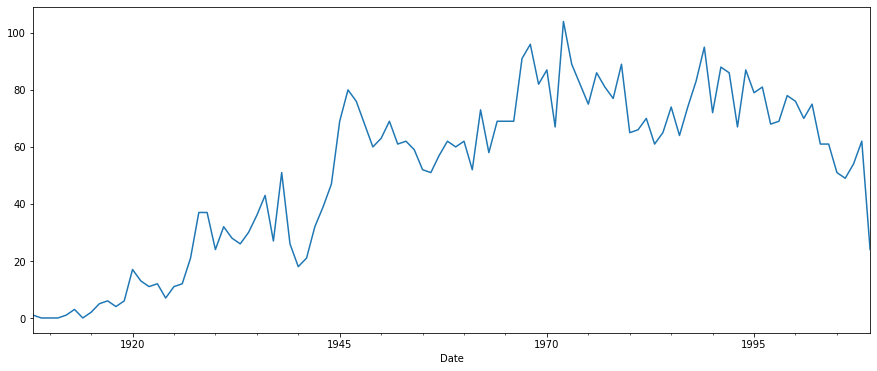

In [11]:
# Plot crashes over time to see them visually
crash.resample('Y')['Operator'].count().plot(figsize=(15,6))

### 2.1.1: which year was the one with the least/most crashes?

In [12]:
# Least Crashes:
crash.resample('Y')['Operator'].count().nsmallest(4)

Date
1909-12-31    0
1910-12-31    0
1911-12-31    0
1914-12-31    0
Name: Operator, dtype: int64

In [13]:
# Most Crashes:
crash.resample('Y')['Operator'].count().nlargest(1)

Date
1972-12-31    104
Freq: A-DEC, Name: Operator, dtype: int64

### 2.2: on avg. how many months are in between crashes?

In [14]:
# Will need to add a column with days since last crash. 
# But first, make sure that they're all sorted by date
crash.sort_index(inplace=True)
crash.head(3)

,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
Date,,,,,,,,,,,,
1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...


In [15]:
# Now calculate days since last crash.  Will have to temporarily reset the index to run calcs on it
crash.reset_index(inplace=True)  # temporarily move the Date out of the index so I can calculate the time differences
crash['DaysLastCrash'] = (crash['Date'] - crash.shift(1)['Date'])
crash.set_index('Date', inplace=True)   # Now move it back to the index
crash.head(3)

,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,DaysLastCrash
Date,,,,,,,,,,,,,
1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",NaT
1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1394 days
1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,390 days


In [16]:
# Now convert the timedelta type to number of days (can't get averages using TimeDelta)
crash['DaysLastCrash'] = crash['DaysLastCrash'].map(lambda t : t.days)
crash.head(3)

,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,DaysLastCrash
Date,,,,,,,,,,,,,
1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",NaN
1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1394.0
1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,390.0


In [17]:
# Now get the average / 30 to get # of months between crashes
crash['DaysLastCrash'].mean() / 30

0.23282703626352763

Only .232 months or every 7 days

### 2.2.1: what was the longest period in between crashes?

In [18]:
crash['DaysLastCrash'].nlargest(1)

Date
1912-07-12    1394.0
Name: DaysLastCrash, dtype: float64

In [19]:
ended = crash['DaysLastCrash'].idxmax()
ended

Timestamp('1912-07-12 00:00:00')

In [20]:
crash.loc[:ended].tail(2)

,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,DaysLastCrash
Date,,,,,,,,,,,,,
1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",NaN
1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1394.0


Looks like the longest time frame between 1908 and 1912

### 2.3: which Operator suffered the most crashes in history?

In [21]:
crash['Operator'].value_counts().sort_values(ascending=False)

Aeroflot                                179
Military - U.S. Air Force               176
Air France                               70
Deutsche Lufthansa                       65
United Air Lines                         44
                                       ... 
Halvorson - Air Taxi                      1
Viking Air Service - Air Taxi             1
Military - People's Liberation Army       1
Soc. de Tr. Aériens d'Extrême Orient      1
Churchill Falls Co.                       1
Name: Operator, Length: 2477, dtype: int64

Aeroflot had the most crashes (whoever they are...)  
Update: Looks like they're a Russian airline

### 3.1: from the Route column exract start and destination and create new columns for each

In [22]:
# Lets take a look at the Route column first
crash.Route.head(10)

Date
1908-09-17    Demonstration
1912-07-12      Test flight
1913-08-06              NaN
1913-09-09              NaN
1913-10-17              NaN
1915-03-05              NaN
1915-09-03              NaN
1916-07-28              NaN
1916-09-24              NaN
1916-10-01              NaN
Name: Route, dtype: object

In [23]:
crash.Route.tail(10)

Date
2009-04-09                                    Jayapura - Wamena
2009-04-17                                        Ilaga - Mulia
2009-04-17                                   Canaima - Porlamar
2009-04-29    Bangui, CAR- Brazzaville, Congo - Harare, Zimb...
2009-05-03                                               Patrol
2009-05-20                                     Jakarta - Maduin
2009-05-26                                         Goma - Isiro
2009-06-01                               Rio de Janeiro - Paris
2009-06-07            Lourdes de BlanSablon - Port Hope Simpson
2009-06-08                                   Mechuka for Jorhat
Name: Route, dtype: object

In [24]:
# Looks like some of them have a ` - ` between Departing and Arrival locations.  
# There's also a lot of junk data and some "Test flights", "Patrols", etc that I'll have to adjust for
# First let's see how many flights have a dash 
crash['Route'].str.contains(" - ").count()

3562

In [25]:
# Decent amount.  Are there any rows where the dash shows up more than once?
# Compare against # of records with a dash in Route
len( crash[crash['Route'].str.contains(" - ", na=False)] )

3339

In [26]:
# Yup, some rows have more than one dash.  
# Parse all text into a new dataframe, then grab the first and last for the arrival / departure
expandedRoute = crash['Route'].str.split(" - ", expand=True)
expandedRoute.tail()

,0,1,2,3,4
Date,,,,,
2009-05-20,Jakarta,Maduin,None,None,None
2009-05-26,Goma,Isiro,None,None,None
2009-06-01,Rio de Janeiro,Paris,None,None,None
2009-06-07,Lourdes de BlanSablon,Port Hope Simpson,None,None,None
2009-06-08,Mechuka for Jorhat,None,None,None,None


In [27]:
crash['Departure'] = expandedRoute[0]
crash.tail(3)

,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,DaysLastCrash,Departure
Date,,,,,,,,,,,,,,
2009-06-01,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,6.0,Rio de Janeiro
2009-06-07,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,6.0,Lourdes de BlanSablon
2009-06-08,NaN,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...,1.0,Mechuka for Jorhat


In [28]:
# Create a function to get the Arrival text
def findArrival(routeDF):
    if (pd.notna(routeDF[-1])):
        return routeDF[-1]
    elif (pd.notna(routeDF[-2])):
        return routeDF[-2]
    elif (pd.notna(routeDF[-3])):
        return routeDF[-3]
    else:
        return routeDF[-4]

In [29]:
crash['Arrival'] = expandedRoute.apply(findArrival)
crash.tail()

,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,DaysLastCrash,Departure,Arrival
Date,,,,,,,,,,,,,,,
2009-05-20,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",17.0,Jakarta,NaN
2009-05-26,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,6.0,Goma,NaN
2009-06-01,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,6.0,Rio de Janeiro,NaN
2009-06-07,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,6.0,Lourdes de BlanSablon,NaN
2009-06-08,NaN,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...,1.0,Mechuka for Jorhat,NaN


In [30]:
# I'm tired and can't figure out how to get the Arrival location.  If anyone has suggestions let me know

### 3.2: what´s the most common weekday for crashes?

In [31]:
crash['Weekday'] = crash.index.map(lambda d: d.weekday() )
crash.head()

,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,DaysLastCrash,Departure,Arrival,Weekday
Date,,,,,,,,,,,,,,,,
1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",NaN,Demonstration,NaN,3
1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1394.0,Test flight,NaN,4
1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,390.0,NaN,NaN,2
1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,34.0,NaN,NaN,1
1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,38.0,NaN,NaN,4


In [32]:
crash['Weekday'].value_counts(ascending=False)

3    818
4    797
2    796
1    796
5    741
0    713
6    607
Name: Weekday, dtype: int64

Wednesday has the most crashes (weekday 3)

### 4.1: on avg. how many passengers survive a crash (if any)? Create a new column called survival rate

In [33]:
# First add columns for Survivors and SurvivalRate
crash['Survivors'] = crash['Aboard'] - crash['Fatalities']
crash['SurvivalRate'] = round((crash ['Survivors'] / crash['Aboard']), 3)
crash.tail()

,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,DaysLastCrash,Departure,Arrival,Weekday,Survivors,SurvivalRate
Date,,,,,,,,,,,,,,,,,,
2009-05-20,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",17.0,Jakarta,NaN,2,14.0,0.125
2009-05-26,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,6.0,Goma,NaN,1,0.0,0.000
2009-06-01,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,6.0,Rio de Janeiro,NaN,0,0.0,0.000
2009-06-07,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,6.0,Lourdes de BlanSablon,NaN,6,0.0,0.000
2009-06-08,NaN,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...,1.0,Mechuka for Jorhat,NaN,0,0.0,0.000


In [34]:
# Now calculate the average of Survivors
crash['Survivors'].mean()

7.471025543271064

In [35]:
# and for mini bonus, the average SurvivalRate
crash['SurvivalRate'].mean()

0.16506540808543108

## Bonus:

### - What were the most common causes for crashes? Could be extraced from the Summarycolumn (e.g. most common words)

### - display the crash location on a map (might need longitude and latitude)

### - categorize the Type column by maker (e.g. Boeing, Lockheed....)

### - what´s the overall crash rate? (need to find data on total flights from 1908)